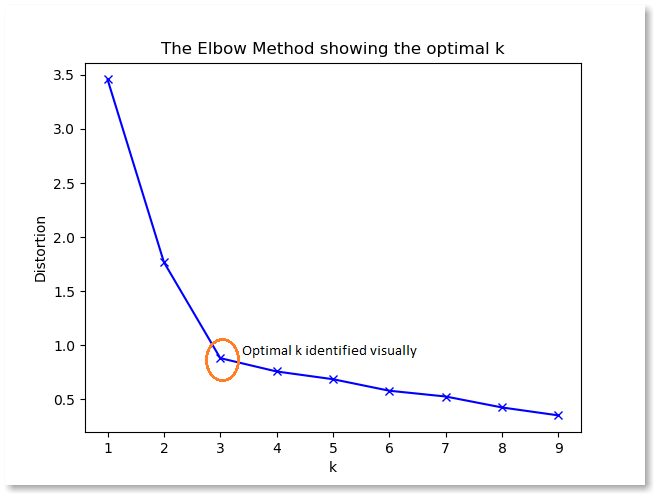

In [17]:
""" Automated selection of k in k-means clustering is a challanging problem in unsupervised machine learning.
    Often you need to select the cluster number autimatically & passing it to another function without human interaction.
    While you can argue against that you can't get always the optimal k very ofthen this solution is usually good enough.
"""

# For big data the Elbow method is usually a good solution to find the right cluster number.
# On the Elbow curve we should choose a number of clusters so that 
#  adding another cluster doesn't give much better modeling of the data.
# With other words, where the curve is starting to flatten and 
#  the gap between the variance numbers isn't that significat anymore is the optimal k.

from IPython.display import Image
Image(filename='elbow-method1.png')

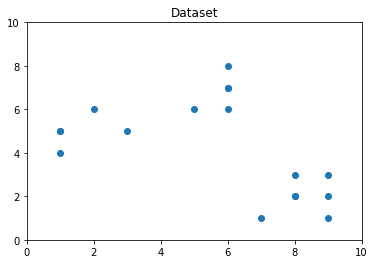

In [11]:
# My focus is on the automatic identification of the optimal k, therefor I borrowed the code of a simple example.
# Thanks to pythonprogramminglanguage.com for sharing it on the web.
# https://pythonprogramminglanguage.com/kmeans-elbow-method/

# Let's create a sample data set & visualize it

import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

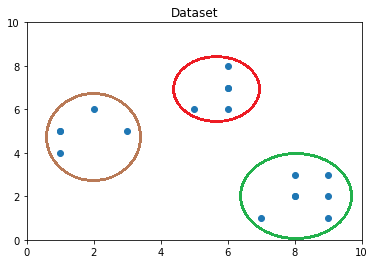

In [8]:
# It's easy for the human eye to see the 3 groups of dots.
# That's the k we're going to find automatically

from IPython.display import Image
Image(filename='elbow-method2.png')

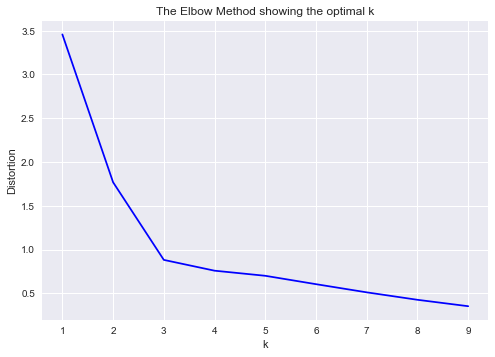

In [26]:
# Now let's visualize it on an Elbow curve
# And determine k using k-means

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow curve
plt.style.use('seaborn')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

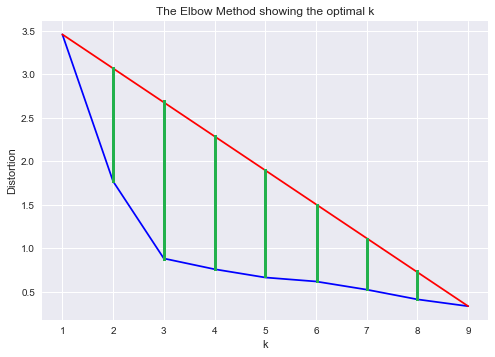

In [14]:
# The solution we're going to use finding the optimal k, 3 in our case, is very simple.
# We're going to connect the two end points of the Elbow curve with a linear function.
# And we'll look for the point which is the furthest from that line.
# In normal cases, as the Elbow curve starts to flatten, it starts to tend closer again to our linear function.

from IPython.display import Image
Image(filename='elbow-method3.png')

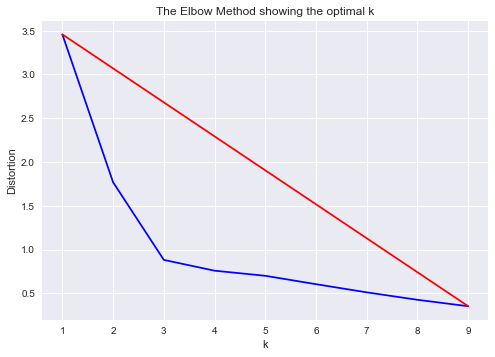

In [28]:
""" Let's see the code to do it """

# Draw a linear function between the end points
# (y2 - y1 / x2 - x1) * x + c
linear = []
ld = len(distortions)
steep = (distortions[ld-1] - distortions[0]) / (ld - 1)
c = distortions[ld-1] - steep * ld
for x in range(0,ld):
    linear.append(steep * (x+1) + c)

# Visualize the Elbow curve and the Linear function between the end point of it
plt.plot(K, distortions, 'bx-', color = 'blue')
plt.plot(K, linear, 'bx-', color = 'red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
# And last we look for max distance between the points
distances = np.array(linear)-np.array(distortions)
max_index = distances.argmax(axis=0)+1

# Print the optimal cluster number
print('Optimal cluster number: ',max_index)

Optimal cluster number:  3
